blah blah

In [18]:
import pandas as pd
import numpy as np
import json as js
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
%matplotlib inline


## Part 1. Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [5]:
df_login = pd.read_json('./logins.json')
df_login['login_time'] = pd.to_datetime(df_login['login_time'])
df_login = df_login.set_index('login_time')
df_login['value'] = 1
df_login = df_login.resample('15MIN').count()

### Initial plot

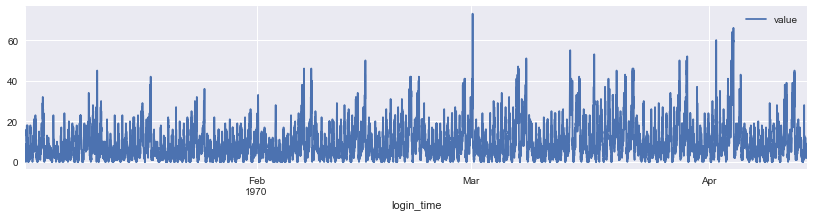

In [7]:
df_login.plot(figsize = (14,3))

### time by day

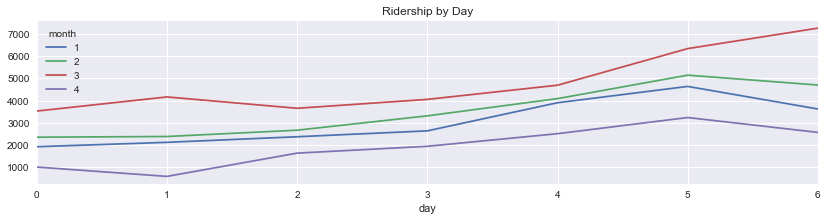

In [15]:
df = df_login.reset_index()
df['month'] = df['login_time'].dt.month
df['day'] = df['login_time'].dt.weekday
_= df.pivot_table(index = 'day', columns = 'month', values= 'value',aggfunc=np.sum)\
.plot(figsize = (14,3), title = 'Ridership by Day')

### Create heat maps of times. Normalize by day. 

In [19]:
df = df_login.reset_index()
df['day'] = df['login_time'].dt.day
df['wday'] = df['login_time'].dt.weekday
df['month'] = df['login_time'].dt.month
df['hour'] = df['login_time'].dt.hour
df['weekend'] = ['weekend' if i in [5,6] else 'weekday' for i in df.wday ]

#### Month by weekday at hour level

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, _DataConversionWarning)


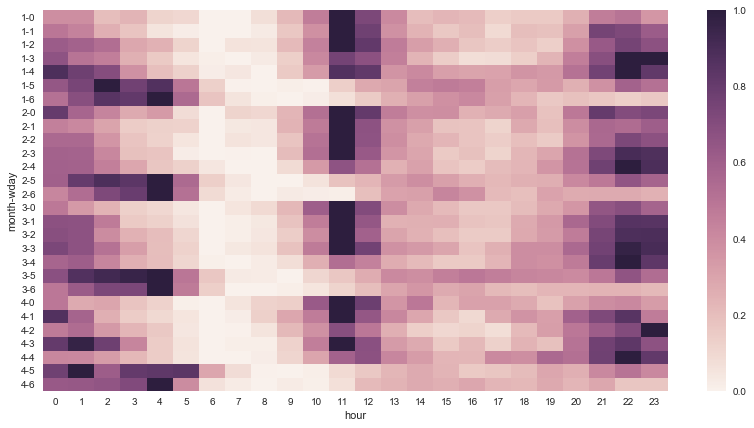

In [24]:
plt.figure(figsize = (14,7))
df_pivot=df.pivot_table(index = 'hour', columns = ['month','wday'], values= 'value',aggfunc=np.sum)
df_pivot = df_pivot.apply(lambda x: minmax_scale(x))
sns.heatmap(df_pivot.T)

#### Month by weekday at day hour level

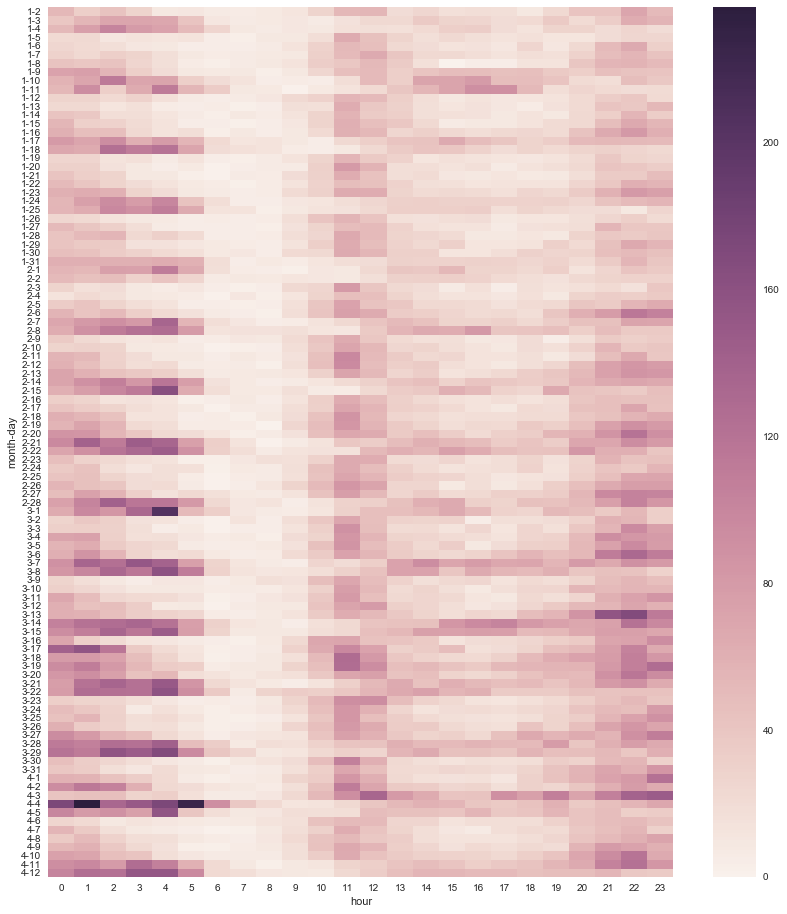

In [25]:
plt.figure(figsize = (14,16))
df_pivot = df.pivot_table(index = 'hour' , columns = ['month','day'], values = 'value', aggfunc = np.sum)
df_pivot = df_pivot.T.dropna().T
sns.heatmap(df_pivot.T)

## Data Dictionary

    ● city: city this user signed up in
    ● phone: primary device for this user
    ● signup_date: date of account registration; in the form ‘YYYY MM DD’
    ● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
    ● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    ● avg_rating_by_driver: the rider’s average rating over all of their trips
    ● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
    ● surge_pct: the percent of trips taken with surge multiplier > 1
    ● avg_surge: The average surge multiplier over all of this user’s trips
    ● trips_in_first_30_days: the number of trips this user took in the first 30 days after
    signing up
    ● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
    FALSE otherwise
    ● weekday_pct: the percent of the user’s trips occurring during a weekday

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

In [15]:
import json
with open('./ultimate_data_challenge.json') as data_file:    
    data = json.load(data_file)
df = pd.DataFrame(data)

In [19]:
df

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0          3.67                   5.0                   4.7       1.10   
1          8.26                   5.0                   5.0       1.00   
2          0.77                   5.0                   4.3       1.00   
3          2.36                   4.9                   4.6       1.14   
4          3.13                   4.9                   4.4       1.19   
5         10.56                   5.0                   3.5       1.00   
6          3.95                   4.0                   NaN       1.00   
7          2.04                   5.0                   5.0       1.00   
8          4.36                   5.0                   4.5       1.00   
9          2.37                   5.0                   NaN       1.00   
10         4.28                   4.9                   5.0       1.00   
11         3.81                   5.0                   4.0       1.00   
12        20.29                   5.0                   NaN       1.00   
13         3.04                   5.0                   4.0       1.38   
14        26.01                   5.0                   NaN       1.00   
15        13.20                   5.0                   NaN       1.00   
16        10.86                   3.0                   5.0       1.00   
17         2.38                   4.8                   3.9       1.00   
18         6.83                   4.8                   4.6       1.21   
19        12.08                   5.0                   5.0       1.17   
20         2.53                   3.0                   NaN       1.00   
21         3.31                   5.0                   NaN       1.00   
22        11.47                   5.0                   NaN       1.00   
23         7.74                   5.0                   5.0       1.00   
24         2.10                   4.7                   4.5       1.02   
25        14.48                   5.0                   NaN       1.00   
26         1.66                   5.0                   4.0       1.00   
27         3.05                   5.0                   5.0       1.05   
28         5.97                   5.0                   NaN       1.50   
29        11.25                   5.0                   4.0       1.00   
...         ...                   ...                   ...        ...   
49970      5.62                   5.0                   4.3       1.00   
49971      4.69                   5.0                   NaN       1.00   
49972      4.60                   3.5                   4.0       1.25   
49973      4.07                   5.0                   4.0       1.00   
49974      4.63                   5.0                   5.0       2.00   
49975      2.18                   4.8                   3.9       1.03   
49976      2.39                   4.0                   2.0       1.00   
49977      8.71                   5.0                   5.0       1.00   
49978      6.02                   5.0                   4.5       1.00   
49979      3.81                   4.8                   4.0       1.00   
49980     14.42                   5.0                   NaN       1.00   
49981      5.49                   5.0                   4.0       1.00   
49982     15.23                   5.0                   5.0       1.00   
49983     30.39                   5.0                   1.0       1.00   
49984      3.50                   5.0                   NaN       1.00   
49985      1.38                   5.0                   NaN       1.00   
49986      0.52                   5.0                   4.0       1.00   
49987      4.24                   4.0                   4.6       1.00   
49988      2.53                   5.0                   4.5       1.00   
49989      0.00                   5.0                   NaN       1.00   
49990      3.38                   5.0                   4.7       1.08   
49991      1.06                   5.0                   5.0       1.25   
49992      

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).